### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [114]:
import numpy as np
import pandas as pd
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep='\t')
df

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


In [117]:
print(len(df['effectiveness'].unique()))
print(len(df['sideEffects'].unique()))
print(len(df['condition'].unique()))
print(len(df['benefitsReview'].unique()))
print(len(df['sideEffectsReview'].unique()))
print(len(df['commentsReview'].unique()))

5
5
1427
3032
2814
3047


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [118]:
df2 = df.drop(['Unnamed: 0', 'urlDrugName', 'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'], axis=1)

df2

,rating,effectiveness,sideEffects
0,4,Highly Effective,Mild Side Effects
1,1,Highly Effective,Severe Side Effects
2,10,Highly Effective,No Side Effects
3,3,Marginally Effective,Mild Side Effects
4,2,Marginally Effective,Severe Side Effects
...,...,...,...
3102,10,Highly Effective,Mild Side Effects
3103,1,Ineffective,Extremely Severe Side Effects
3104,2,Marginally Effective,Moderate Side Effects
3105,8,Considerably Effective,Mild Side Effects


#### Transforma las columnas categoricas

In [120]:
df_dummies = df2.copy()

In [121]:
my_dict = {"Ineffective":0,
            "Marginally Effective":1,
            "Moderately Effective":2,
            "Considerably Effective":3,
            "Highly Effective":4}
df_dummies["effectiveness"] = df_dummies["effectiveness"].replace(my_dict)

In [122]:
my_dict = {"No Side Effects":0,
            "Mild Side Effects":1,
            "Moderate Side Effects":2,
            "Severe Side Effects":3,
            "Extremely Severe Side Effects":4}

df_dummies["sideEffects"] = df_dummies["sideEffects"].replace(my_dict)

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [124]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

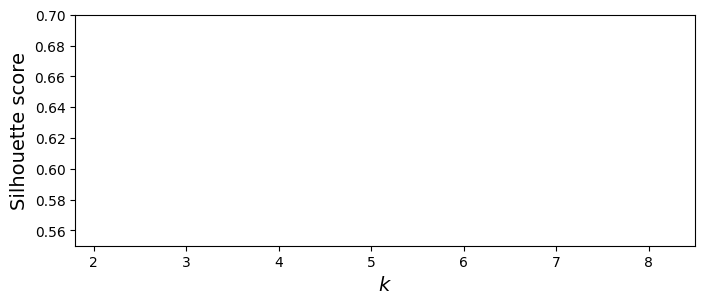

In [146]:
kmeans_per_k = [KMeans(n_init=10, n_clusters=k, random_state=42).fit(df_dummies)
                for k in range(2, 21)]

inertias = [model.inertia_ for model in kmeans_per_k]

silhouette_scores = [silhouette_score(df_dummies, model.labels_)
                     for model in kmeans_per_k[1:]]

In [135]:
silhouette_scores

[0.4541665291694327,
 0.416701237123931,
 0.4152173517501398,
 0.40776675491666886,
 0.4044764199227224,
 0.3887036746255966,
 0.4139468434587661,
 0.40740876245511143,
 0.4310097927318671,
 0.41912862408038365,
 0.450394584220656,
 0.44377205508086864,
 0.4749334479957321,
 0.4695772796209039,
 0.44546484700984557,
 0.4782314160347267,
 0.49830764606243394,
 0.512065244649811]

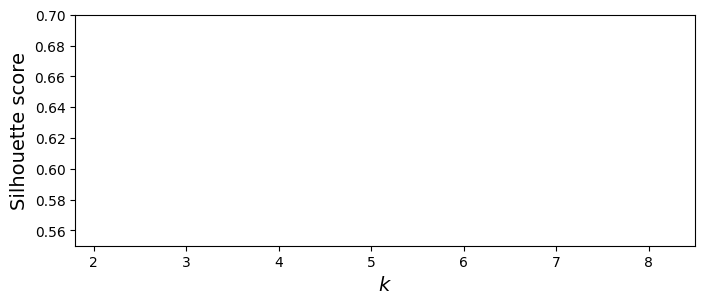

In [145]:
plt.figure(figsize=(8,3))
plt.plot(range(2,20), silhouette_scores, "bo-")
plt.xlabel("$k$",fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

Mayor silhouette scores con K=2

In [ ]:
silhouette_score(df_dummies, kmeans.labels_)

Con el Elbow method comprobamos que k=2 sería la opción más adecuada

In [ ]:
df_kmeans = pd.DataFrame(inertias, columns=['inertia'])
df_kmeans

KeyError: 0

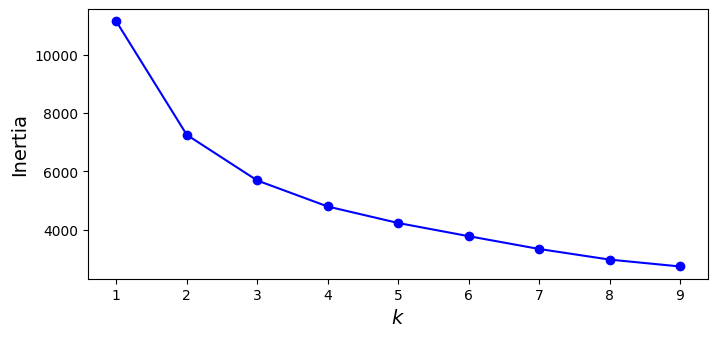

In [144]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), df_kmeans, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, df_kmeans[0]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
# save_fig("inertia_vs_k_plot")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=101)
y_pred = kmeans.fit_predict(df_dummies)

c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#### Muestra en un gráfico de tartas la distribución de los distintos clusters

In [ ]:
df_cluster = pd.DataFrame(kmeans.labels_, columns=['Cluster'])

<Axes: ylabel='count'>

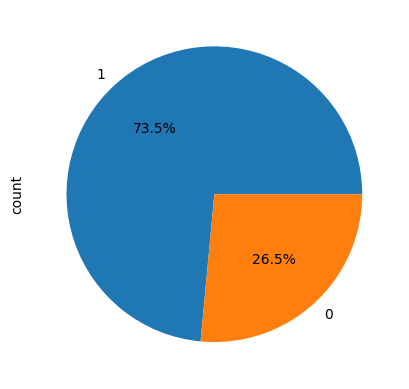

In [ ]:
df_cluster['Cluster'].value_counts().plot.pie(autopct="%.1f%%")